In [4]:
#Import to dataset and analyze it

In [39]:
import numpy as np 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.core import Flatten, Dense, Activation, Reshape

In [40]:
folders = glob('C:/Users/Jainab/Desktop/real_and_fake_face/*')

In [41]:
real = 'C:/Users/Jainab/Desktop/real_and_fake_face/training_real'
fake = 'C:/Users/Jainab/Desktop/real_and_fake_face/training_fake'

(600, 600, 3)

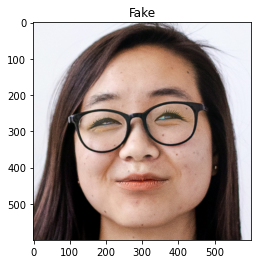

In [11]:
img=plt.imread('C:/Users/Jainab/Desktop/real_and_fake_face/training_fake/hard_202_1101.jpg')
plt.imshow(img,cmap='gray')
plt.title('Fake')
img.shape

(600, 600, 3)

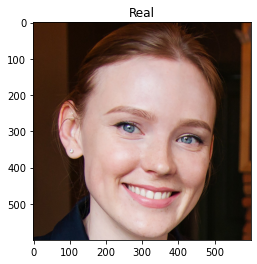

In [12]:
img=plt.imread('C:/Users/Jainab/Desktop/real_and_fake_face/training_real/real_00054.jpg')
plt.imshow(img,cmap='gray')
plt.title('Real')
img.shape

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam

In [14]:
from keras.applications.densenet import DenseNet169
densenet=DenseNet169(weights='imagenet',include_top=False,input_shape=(96,96,3))
for layer in densenet.layers:
  if 'conv5' in layer.name:
    layer.trainable = True
  else:
    layer.trainable = False

densenet.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 48, 48, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 48, 48, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [16]:
import tensorflow as tf
model=Sequential()
model.add(densenet)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Functional)     (None, 3, 3, 1664)        12642880  
_________________________________________________________________
flatten (Flatten)            (None, 14976)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14976)             59904     
_________________________________________________________________
dense (Dense)                (None, 256)               3834112   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,537,153
Trainable params: 9,777,921
Non-trainable params: 6,759,232
_________________________________________________________________


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True)
training_set = train_datagen.flow_from_directory('C:/Users/Jainab/Desktop/real_and_fake_face',
                                                 target_size=(96,96),
                                                 batch_size=32,
                                                 class_mode='binary',
                                                 color_mode='rgb',
                                                 shuffle=True
                                                 )
training_set.class_indices

Found 2041 images belonging to 2 classes.


{'training_fake': 0, 'training_real': 1}

In [33]:
r = model.fit_generator(
  training_set,
  epochs=35,
  steps_per_epoch=len(training_set)
 )


Epoch 1/35
64/64 [==============================] - 70s 1s/step - loss: 0.2035 - accuracy: 0.9123
Epoch 2/35
64/64 [==============================] - 68s 1s/step - loss: 0.2269 - accuracy: 0.9133
Epoch 3/35
64/64 [==============================] - 66s 1s/step - loss: 0.1916 - accuracy: 0.9236
Epoch 4/35
64/64 [==============================] - 72s 1s/step - loss: 0.2007 - accuracy: 0.9226
Epoch 5/35
64/64 [==============================] - 69s 1s/step - loss: 0.1728 - accuracy: 0.9226
Epoch 6/35
64/64 [==============================] - 66s 1s/step - loss: 0.1591 - accuracy: 0.9348
Epoch 7/35
64/64 [==============================] - 67s 1s/step - loss: 0.2104 - accuracy: 0.9138
Epoch 8/35
64/64 [==============================] - 69s 1s/step - loss: 0.1950 - accuracy: 0.9187
Epoch 9/35
64/64 [==============================] - 68s 1s/step - loss: 0.1899 - accuracy: 0.9236
Epoch 10/35
64/64 [==============================] - 68s 1s/step - loss: 0.1738 - accuracy: 0.9319
Epoch 11/35
64/64 [

In [35]:
r.history

{'loss': [0.20346473157405853,
  0.22688117623329163,
  0.1915641874074936,
  0.2006792277097702,
  0.17278043925762177,
  0.15909424424171448,
  0.2104257196187973,
  0.1949750781059265,
  0.18994608521461487,
  0.1738194078207016,
  0.15915396809577942,
  0.1828092634677887,
  0.16668061912059784,
  0.17914165556430817,
  0.15264223515987396,
  0.12676921486854553,
  0.16066119074821472,
  0.15087316930294037,
  0.15145212411880493,
  0.1336178481578827,
  0.1346515715122223,
  0.13786543905735016,
  0.13866743445396423,
  0.1359356790781021,
  0.11717378348112106,
  0.16493721306324005,
  0.11255823820829391,
  0.11789405345916748,
  0.11669208109378815,
  0.12953445315361023,
  0.13066424429416656,
  0.12848035991191864,
  0.14077270030975342,
  0.13074971735477448,
  0.10744545608758926],
 'accuracy': [0.9122979044914246,
  0.913277804851532,
  0.9235668778419495,
  0.922586977481842,
  0.922586977481842,
  0.9348358511924744,
  0.9137677550315857,
  0.9186673164367676,
  0.923566

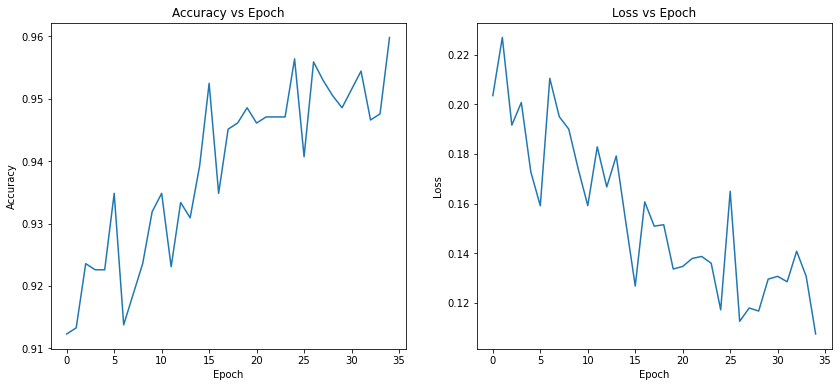

In [37]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(r.history['accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.subplot(1,2,2)
plt.plot(r.history['loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [38]:
from tensorflow.keras.models import load_model
model.save('model_deepFake.h5')